In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
import psix

# iPSC neurogenesis

Here we analyse a smart-seq2 dataset from [Song et al (2017)](https://www.sciencedirect.com/science/article/pii/S1097276517304057) that follows the differentiation of human induced pluripotent stem cells (iPSC) into neural progenitors (NPC) and mature neurons.

This dataset originally consists of 206 cells. However, after quality control and normalization, we removed many cells that had poor coverage. This left a total of 202 cells. 

<img src="plots/PCA.png" width="300"/>

In [2]:
psix_object = psix.Psix()
psix_object.junctions2psi(
        '/mnt/lareaulab/cfbuenabadn/RNASeq/Human/Botvinnik/SJ_tables/',
        '/mnt/lareaulab/cfbuenabadn/Genomes/pipeline_files/hg38_introns.tab',
        'data/pipeline_output/rsem_gene_tpm.tab.gz',
        save_files_in='psix_output/'
    )

100%|██████████| 202/202 [00:26<00:00,  7.72it/s]


Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 202/202 [00:08<00:00, 24.75it/s]


Successfully processed RNA-seq data


In [3]:
psix_object = psix.Psix(psi_table = 'psix_output/psi.tab.gz',
                        mrna_table = 'psix_output/mrna.tab.gz')

In [4]:
psix_object.run_psix(latent='data/preprocess/tables/pc2_rd.tab.gz', n_jobs=25, n_random_exons=2000, n_neighbors=30)

Computing cell-cell metric...


100%|██████████| 202/202 [00:00<00:00, 1125.12it/s]

Successfully computed cell-cell metric
Computing Psix score in 2730 exons



100%|██████████| 2730/2730 [00:07<00:00, 389.35it/s] 


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


100%|██████████| 25/25 [01:53<00:00,  4.54s/it]


Successfully estimated p-values


In [5]:
psix_object.psix_results.head()

,psix_score,pvals,qvals
VDAC3_5,2.805371,0.0005,0.006435
TACC2_9,2.664097,0.0005,0.006435
ERGIC3_5,2.623454,0.0005,0.006435
RPS24_4,2.556271,0.0005,0.006435
ATL1_5,2.366741,0.0005,0.006435


Successfully computed neighbors


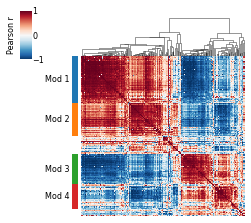

In [6]:
psix_object.compute_modules(plot = True, plot_name = 'psix_output/exon_modules.png', n_neighbors=30)

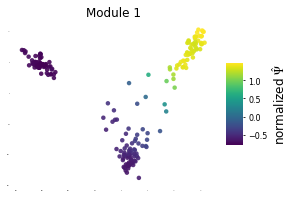

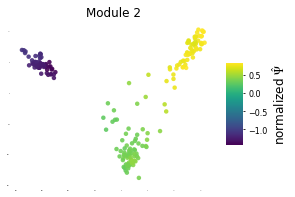

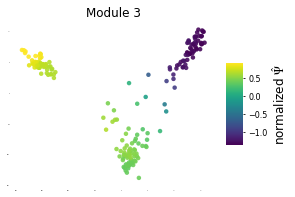

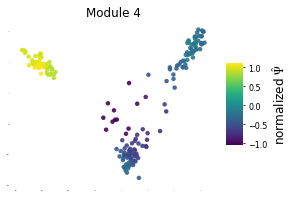

In [7]:
psix_object.plot_modules()

In [9]:
psix_object.save_psix_object(psix_dir = 'psix_output/')